In [1]:
# Beginning of "eda.ipynb"

# Exploratory Data Analysis

The following is the data analysis done after the first part of the project which was to create synthetic data that represents a transportation problem. Want to explore the results of said dataset.

In [2]:
# Import necessary libraries and modules
import yaml # Read config files
import time
import pandas as pd
pd.set_option('display.max_rows', 12)
pd.set_option('display.max_columns', 10)
from sqlalchemy import create_engine

### Establish a database connection using SQLAlchemy

In [4]:
# Read the configuration file
with open("config.yaml", "r") as file:
    config = yaml.safe_load(file)
# Load credentials into variables
dbname=config["database"]["name"]
user=config["server"]["user"]
password=config["server"]["password"]
host=config["server"]["host"]
port=config["server"]["port"]
# Replace with your PostgreSQL credentials and database details
db_connection_str = f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{dbname}"
# Create the engine
db_connection = create_engine(db_connection_str)
# Table name
tbl_name = 'transportation_problem'
start_time = time.time() # get start time before insert
try:
    # Read a whole table
    df_table = pd.read_sql_table(
        tbl_name,
        con=db_connection
    )
    print("DataFrame successfully moved to PostgreSQL!")
except Exception as e:
    print(f"Error moving the DataFrame to PostgreSQL database: {e}")
# Ensure cleanup tasks are performed
finally: db_connection.dispose()
end_time = time.time() # get end time after insert
total_time = end_time - start_time # calculate the time
print(f"Insert time: {total_time:.3f} seconds") # print time

DataFrame successfully moved to PostgreSQL!
Insert time: 0.271 seconds


In [5]:
df_table.head(15)

,index,customer_1,customer_2,customer_3,customer_4,...,customer_122,customer_123,customer_124,customer_125,production_capacity
0,factory_1,9,11,11,6,...,13,13,14,13,375.0
1,factory_2,9,14,12,2,...,4,3,3,6,625.0
2,factory_3,1,15,2,12,...,9,15,8,5,125.0
3,factory_4,4,14,11,2,...,14,12,15,5,750.0
4,factory_5,10,2,13,15,...,3,1,7,1,250.0
...,...,...,...,...,...,...,...,...,...,...,...
10,factory_11,11,2,11,12,...,8,12,12,3,625.0
11,factory_12,2,6,10,15,...,1,6,5,2,375.0
12,factory_13,10,9,12,11,...,7,14,14,6,750.0
13,factory_14,10,15,4,9,...,10,2,14,5,250.0


Wanted a random subset of 15 customers to perform some analysis.

In [6]:
# Randomly select 15 columns
n_cols = 15
df2 = df_table.sample(
    n = n_cols,
    axis = 1
)
df2

,customer_114,customer_44,customer_52,customer_54,customer_26,...,customer_113,customer_36,customer_16,customer_27,customer_17
0,3,8,13,14,14,...,14,3,5,12,10
1,12,11,12,13,9,...,13,7,5,10,11
2,14,4,3,3,4,...,13,4,8,11,3
3,7,4,8,7,7,...,3,7,10,10,9
4,1,15,9,5,1,...,6,11,6,1,11
...,...,...,...,...,...,...,...,...,...,...,...
71,11,8,4,10,2,...,2,11,11,9,7
72,5,7,7,4,15,...,8,12,2,5,2
73,7,15,10,2,1,...,13,1,5,4,4
74,6,3,10,2,9,...,15,14,2,6,4


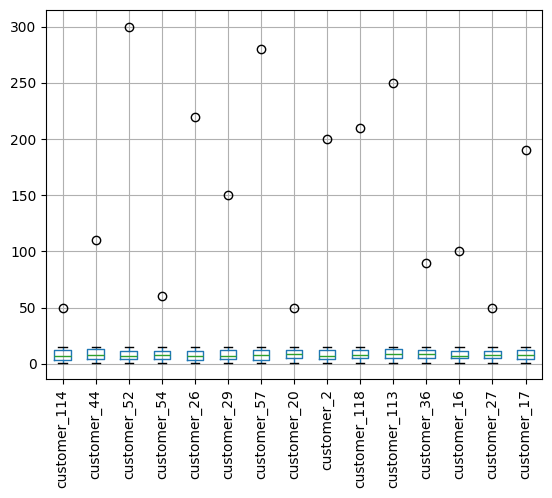

In [9]:
import matplotlib.pyplot as plt
df2.boxplot()
plt.xticks(rotation=90)
plt.show()

In [ ]:
# End of "eda.ipynb"